# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words

## Most Common Words

### Analysis

In [66]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

speaker,tyrion,cersei,jaime,daenerys,jon,sansa,davos,varys,arya,tywin,theon,sam,bronn,brienne,olenna
abandon,1,1,2,0,1,2,1,1,0,1,1,0,0,1,0
abandoned,2,1,0,2,0,0,0,2,0,0,0,1,0,0,1
abandoning,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0
abate,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
abduct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
# Find the top 30 words said by each character
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'tyrion': [('know', 106),
  ('im', 100),
  ('dont', 96),
  ('did', 71),
  ('youre', 69),
  ('like', 69),
  ('father', 68),
  ('want', 67),
  ('good', 60),
  ('queen', 57),
  ('people', 57),
  ('king', 54),
  ('yes', 50),
  ('think', 50),
  ('right', 50),
  ('time', 49),
  ('men', 46),
  ('city', 44),
  ('man', 44),
  ('going', 41),
  ('need', 41),
  ('tell', 41),
  ('oh', 39),
  ('make', 39),
  ('come', 38),
  ('kings', 38),
  ('say', 36),
  ('world', 36),
  ('better', 34),
  ('just', 34)],
 'cersei': [('know', 51),
  ('want', 49),
  ('father', 47),
  ('did', 44),
  ('like', 42),
  ('dont', 42),
  ('king', 40),
  ('good', 39),
  ('youre', 38),
  ('little', 34),
  ('son', 33),
  ('think', 33),
  ('love', 32),
  ('man', 31),
  ('brother', 31),
  ('queen', 28),
  ('daughter', 28),
  ('need', 27),
  ('joffrey', 27),
  ('im', 26),
  ('hes', 25),
  ('make', 25),
  ('ser', 24),
  ('world', 24),
  ('come', 23),
  ('high', 23),
  ('told', 22),
  ('way', 22),
  ('right', 22),
  ('yes', 21)],
 '

In [68]:
# Print the top 15 words said by each character
for character, top_words in top_dict.items():
    print(character)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

tyrion
know, im, dont, did, youre, like, father, want, good, queen, people, king, yes, think
---
cersei
know, want, father, did, like, dont, king, good, youre, little, son, think, love, man
---
jaime
dont, youre, im, know, want, think, come, father, man, did, like, king, good, going
---
daenerys
know, people, want, im, men, did, dont, queen, like, man, need, dragons, good, world
---
jon
know, dont, im, men, need, wall, youre, watch, north, think, king, army, want, father
---
sansa
lord, know, did, im, dont, youre, winterfell, jon, father, north, make, want, think, just
---
davos
grace, king, im, know, stannis, dont, lord, men, man, need, youre, ive, lady, good
---
varys
lord, know, man, im, people, good, dont, did, father, stark, like, say, make, city
---
arya
dont, im, know, youre, did, kill, going, like, lord, want, right, just, doing, lady
---
tywin
king, youre, yes, time, man, good, know, im, tyrion, girl, think, want, dont, house
---
theon
im, know, father, winterfell, reek, dont,

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [70]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each character
words = []
for character in data.columns:
    top = [word for (word, count) in top_dict[character]]
    for t in top:
        words.append(t)
        
words

['know',
 'im',
 'dont',
 'did',
 'youre',
 'like',
 'father',
 'want',
 'good',
 'queen',
 'people',
 'king',
 'yes',
 'think',
 'right',
 'time',
 'men',
 'city',
 'man',
 'going',
 'need',
 'tell',
 'oh',
 'make',
 'come',
 'kings',
 'say',
 'world',
 'better',
 'just',
 'know',
 'want',
 'father',
 'did',
 'like',
 'dont',
 'king',
 'good',
 'youre',
 'little',
 'son',
 'think',
 'love',
 'man',
 'brother',
 'queen',
 'daughter',
 'need',
 'joffrey',
 'im',
 'hes',
 'make',
 'ser',
 'world',
 'come',
 'high',
 'told',
 'way',
 'right',
 'yes',
 'dont',
 'youre',
 'im',
 'know',
 'want',
 'think',
 'come',
 'father',
 'man',
 'did',
 'like',
 'king',
 'good',
 'going',
 'll',
 'stark',
 'dead',
 'men',
 'cersei',
 'lord',
 'right',
 'don',
 'way',
 'kill',
 'didnt',
 'ive',
 'ser',
 'war',
 'look',
 'time',
 'know',
 'people',
 'want',
 'im',
 'men',
 'did',
 'dont',
 'queen',
 'like',
 'man',
 'need',
 'dragons',
 'good',
 'world',
 'tell',
 'right',
 'ser',
 'told',
 'kill',
 'bro

In [71]:
# Let's aggregate this list and identify the most common words along with how many speakers use them
Counter(words).most_common()

[('know', 15),
 ('im', 14),
 ('dont', 14),
 ('did', 13),
 ('youre', 13),
 ('like', 13),
 ('want', 12),
 ('good', 12),
 ('think', 12),
 ('man', 11),
 ('come', 11),
 ('lord', 11),
 ('king', 10),
 ('men', 10),
 ('father', 9),
 ('right', 9),
 ('need', 8),
 ('time', 7),
 ('just', 7),
 ('queen', 6),
 ('people', 6),
 ('going', 6),
 ('tell', 6),
 ('brother', 6),
 ('hes', 6),
 ('didnt', 6),
 ('grace', 6),
 ('yes', 5),
 ('make', 5),
 ('way', 5),
 ('stark', 5),
 ('ive', 5),
 ('oh', 4),
 ('say', 4),
 ('ser', 4),
 ('ll', 4),
 ('kill', 4),
 ('fight', 4),
 ('north', 4),
 ('thats', 4),
 ('kings', 3),
 ('world', 3),
 ('little', 3),
 ('joffrey', 3),
 ('dead', 3),
 ('cersei', 3),
 ('war', 3),
 ('jon', 3),
 ('lady', 3),
 ('got', 3),
 ('city', 2),
 ('son', 2),
 ('told', 2),
 ('don', 2),
 ('let', 2),
 ('iron', 2),
 ('wall', 2),
 ('watch', 2),
 ('night', 2),
 ('winterfell', 2),
 ('stannis', 2),
 ('believe', 2),
 ('girl', 2),
 ('arya', 2),
 ('house', 2),
 ('tyrell', 2),
 ('boy', 2),
 ('shes', 2),
 ('better', 

In [72]:
# If more than half of the characters have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['know',
 'im',
 'dont',
 'did',
 'youre',
 'like',
 'want',
 'good',
 'think',
 'man',
 'come',
 'lord',
 'king',
 'men',
 'father',
 'right',
 'need']

In [74]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean['speaker']

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [75]:
data_clean

,speaker,transcript
855,tyrion,your grace i know my brother he came here alo...
117,cersei,your mother might have prepared you you flowe...
341,jaime,she did she lied to me as well she never had ...
156,daenerys,who stabbed him in the back and cut his throa...
358,jon,we need every man we can get i thought wed lo...
746,sansa,youre right we cant trust him he attacked my ...
176,davos,you are now look i made it through most of my...
884,varys,oh lord tyrion come in come in oh always in c...
29,arya,you make my weapon yet you should make mine f...
866,tywin,wolfsbane a rare substance this is no common ...


In [76]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

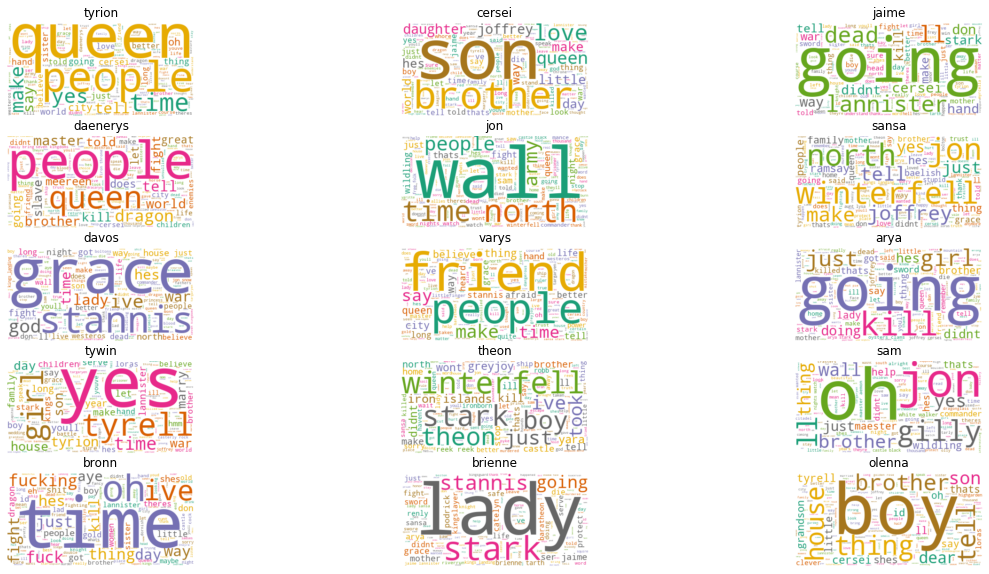

In [77]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

names = list(data_clean['speaker'])

# Create subplots for each comedian
for index, character in enumerate(data.columns):
    n = data_clean[data_clean['speaker']==character]['transcript'].index[0]
    text = data_clean[data_clean['speaker']==character]['transcript'][n]
    wc.generate(text)
    plt.subplot(5, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(names[index])
    
plt.show()

## Vocabulary of each character

In [78]:
data_clean

,speaker,transcript
855,tyrion,your grace i know my brother he came here alo...
117,cersei,your mother might have prepared you you flowe...
341,jaime,she did she lied to me as well she never had ...
156,daenerys,who stabbed him in the back and cut his throa...
358,jon,we need every man we can get i thought wed lo...
746,sansa,youre right we cant trust him he attacked my ...
176,davos,you are now look i made it through most of my...
884,varys,oh lord tyrion come in come in oh always in c...
29,arya,you make my weapon yet you should make mine f...
866,tywin,wolfsbane a rare substance this is no common ...


In [81]:
def unique_words(string):
    string = string.split(' ')
    return len(set(string))
data_clean['unique_words'] = data_clean['transcript'].apply(unique_words)

In [82]:
data_clean

,speaker,transcript,unique_words
855,tyrion,your grace i know my brother he came here alo...,3041
117,cersei,your mother might have prepared you you flowe...,2126
341,jaime,she did she lied to me as well she never had ...,1920
156,daenerys,who stabbed him in the back and cut his throa...,1665
358,jon,we need every man we can get i thought wed lo...,1493
746,sansa,youre right we cant trust him he attacked my ...,1329
176,davos,you are now look i made it through most of my...,1407
884,varys,oh lord tyrion come in come in oh always in c...,1491
29,arya,you make my weapon yet you should make mine f...,1037
866,tywin,wolfsbane a rare substance this is no common ...,1319


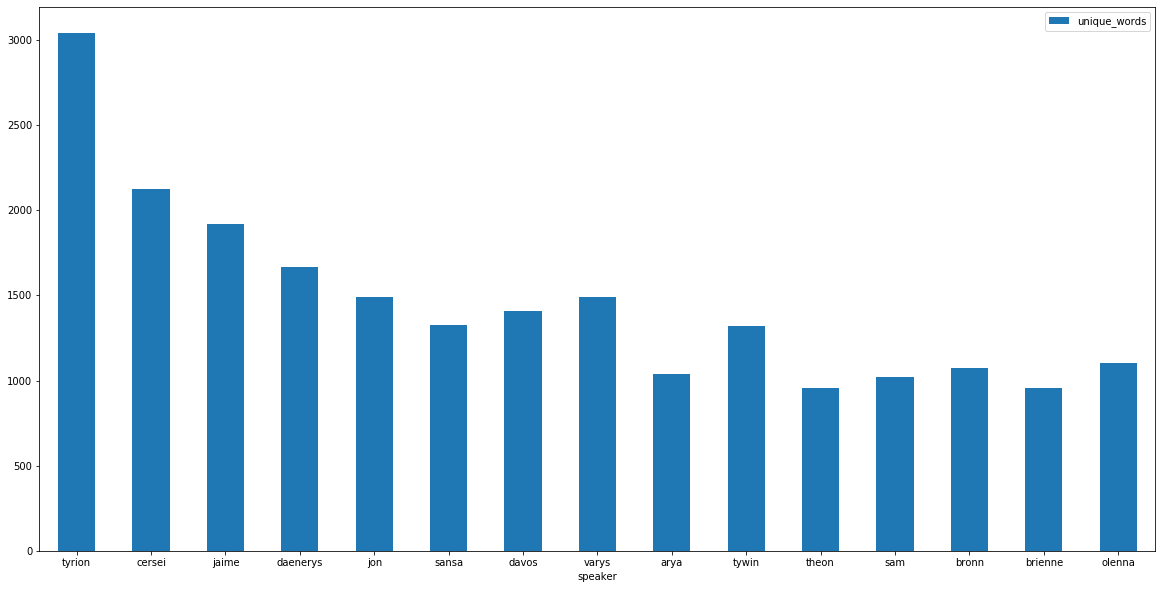

In [83]:
data_clean.plot.bar(x='speaker', y='unique_words', rot=0)

In [ ]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_movies)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

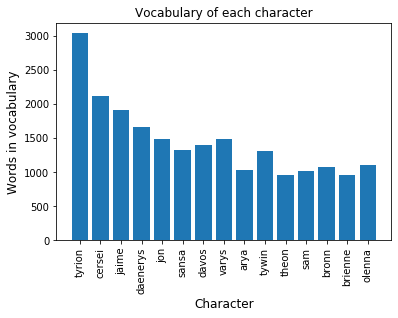

In [56]:
import matplotlib.pyplot as plt
plt.bar(data_clean['speaker'], data_clean['unique_words'])
plt.xlabel('Character', fontsize=12)
plt.ylabel('Words in vocabulary', fontsize=12)
plt.title('Vocabulary of each character')
plt.xticks(rotation='vertical')

In [84]:
data_clean['words_spoken'] = data_clean['transcript'].apply(lambda x: len(x))

In [85]:
data_clean

,speaker,transcript,unique_words,words_spoken
855,tyrion,your grace i know my brother he came here alo...,3041,117527
117,cersei,your mother might have prepared you you flowe...,2126,66597
341,jaime,she did she lied to me as well she never had ...,1920,54161
156,daenerys,who stabbed him in the back and cut his throa...,1665,53155
358,jon,we need every man we can get i thought wed lo...,1493,48141
746,sansa,youre right we cant trust him he attacked my ...,1329,38470
176,davos,you are now look i made it through most of my...,1407,33096
884,varys,oh lord tyrion come in come in oh always in c...,1491,30326
29,arya,you make my weapon yet you should make mine f...,1037,26308
866,tywin,wolfsbane a rare substance this is no common ...,1319,26209


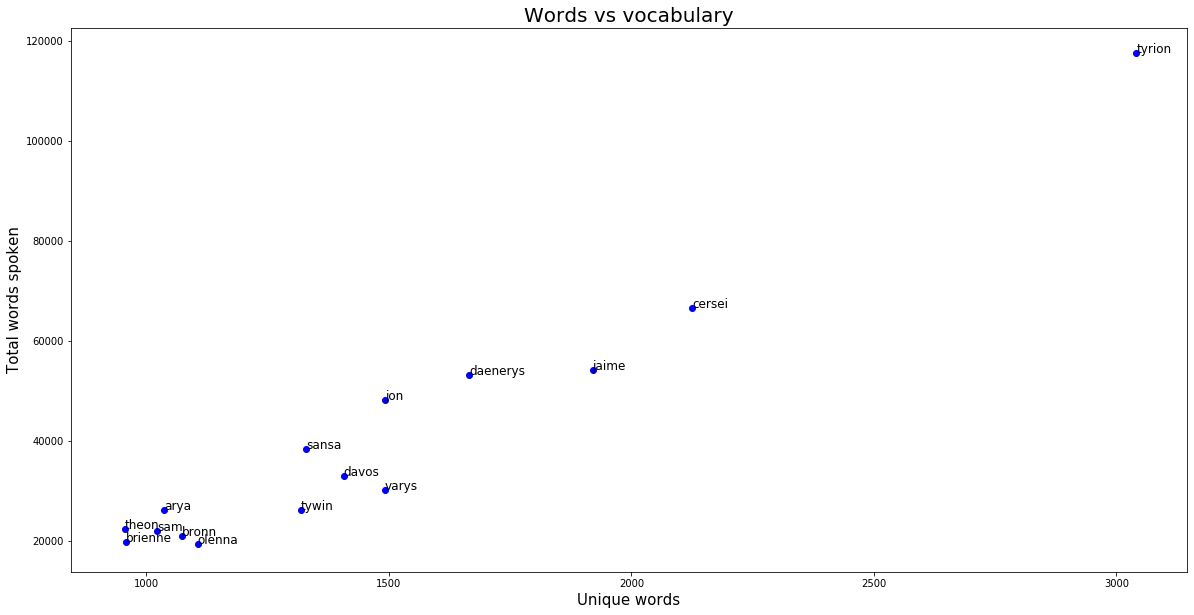

In [86]:
plt.figure(figsize=(20,10))

for index in data_clean.index:
    x = data_clean['unique_words'].loc[index]
    y = data_clean['words_spoken'].loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_clean['speaker'][index], fontsize=12)
    
plt.title('Words vs vocabulary', fontsize=20)
plt.xlabel('Unique words', fontsize=15)
plt.ylabel('Total words spoken', fontsize=15)

plt.show()